## Task 2 - Data Science Mega Case Study

### SID : 2170229

### Data Reading and description

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading provided dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking datatypes of all features in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- All the features are of either float or integer data type, so all variables are continuous except outcome which is our dependent variable and is categorical with 1 beign diabetic and 0 is Non-Diabetic

In [4]:
#checking shape of the dataset available
df.shape

(768, 9)

- There are 768 records in our dataset with 9 features

In [5]:
#Description of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The minumum values for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI are not relevant.

In [6]:
#checking the number of null values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- There are no null values present in our dataset.

In [7]:
#checking number of different unique categories for each feature
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
#checking number of duplicates present in the dataset
df.duplicated().sum()

0

- There are no duplicate entries present in our dataset

In [9]:
#assigning an object to column names of dataset for further pre-processing
cols = df.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

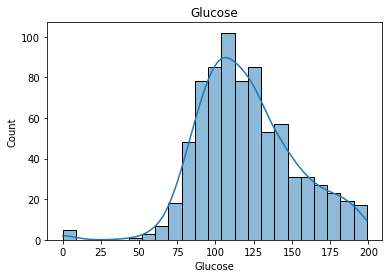

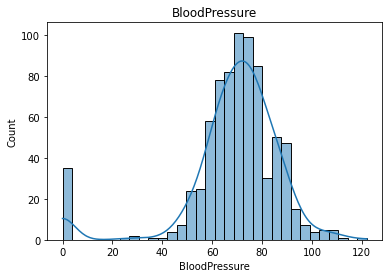

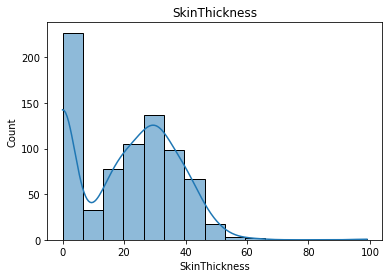

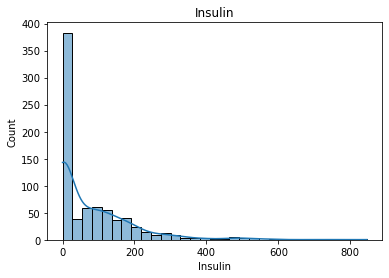

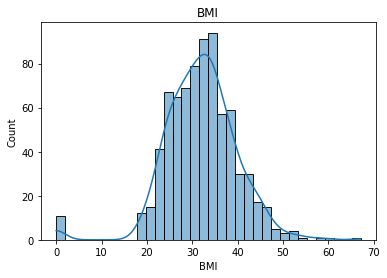

In [10]:
#plotting histogram for each column to check distribution:
for col in cols:
    if col not in ['Outcome','Pregnancies','DiabetesPedigreeFunction','Age']:
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.show()

- It can be concluded from above graph that there are high number of values concentrated at 0. Which is not realistic for Glucose, Blood Pressure, Insuln, BMI and SkinThickness.

- We will consider these values as null and impute it with the mean of corresponding feature in the dataset.

### Data Cleaning

In [11]:
#checking number of zeroes present in each column
for col in cols:
    print(f"Number of 0's in {col} is ",df[df[col]==0].shape[0])

Number of 0's in Pregnancies is  111
Number of 0's in Glucose is  5
Number of 0's in BloodPressure is  35
Number of 0's in SkinThickness is  227
Number of 0's in Insulin is  374
Number of 0's in BMI is  11
Number of 0's in DiabetesPedigreeFunction is  0
Number of 0's in Age is  0
Number of 0's in Outcome is  500


- 0's in Pregnancies and Outcome can be considered as realisitc values so no need to impute those.

In [12]:
#imputing 0 with mean values in required columns
for col in cols:
    if col not in ['Outcome','Pregnancies','DiabetesPedigreeFunction','Age']:
        df[col] = df[col].replace(0,df[col].mean())
        print(f"Number of 0's in {col} is ",df[df[col]==0].shape[0])

Number of 0's in Glucose is  0
Number of 0's in BloodPressure is  0
Number of 0's in SkinThickness is  0
Number of 0's in Insulin is  0
Number of 0's in BMI is  0


- The 0's in the mentioned features are now imputed, we will check the description again.

In [13]:
#Checking the description of dataset again after imputation
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- The minimum values are corrected for Glucose, Blood Pressure, Skin Thickness, Insulin and BMI.

### Exploratory Data Analysis
#### Univariate Analysis

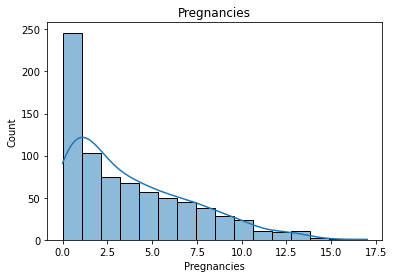

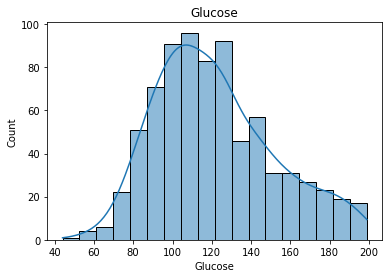

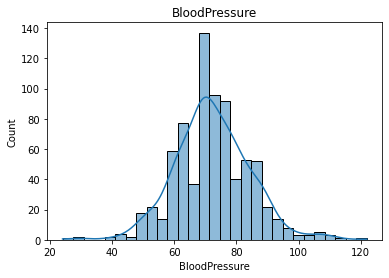

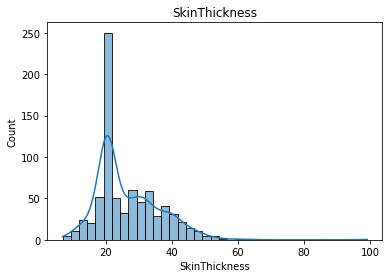

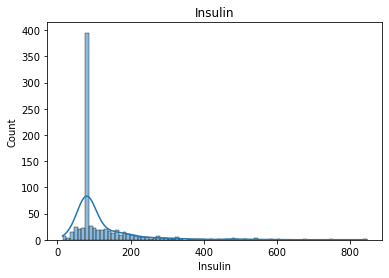

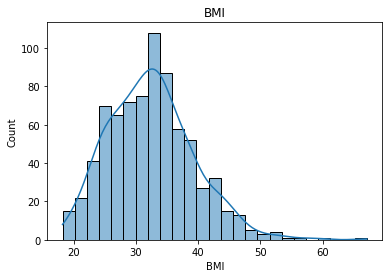

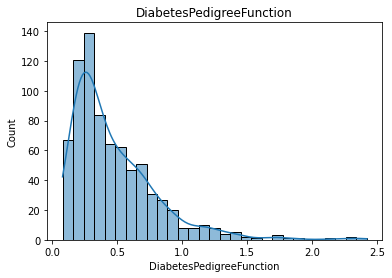

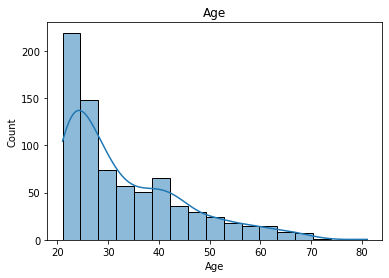

In [14]:
#plotting histogram for each column to check distribution:

for col in cols:
    if col not in ['Outcome']:
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.show()

- Post imputing the 0's or null values the distribution of continuous variables have changed
- Blood Pressure, Glucose shows normal distribution.
- Age starts from minimum of 20 years.

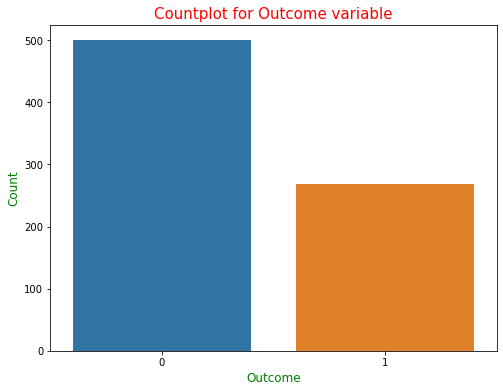

In [15]:
#checking countplot for target variable for better understanding of outcome feature
plt.figure(figsize=(8,6))
sns.countplot(df['Outcome'])
plt.title('Countplot for Outcome variable',fontdict={'color':'red','size':15})
plt.xlabel('Outcome',fontdict={'color':'green','size':12})
plt.ylabel('Count',fontdict={'color':'green','size':12})
plt.show()

- 500 individuals are undiabetic and rest 268 are diabetic.

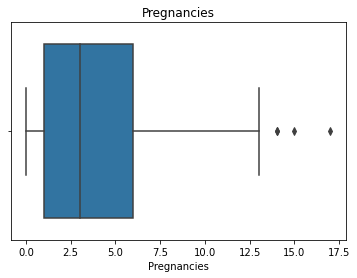

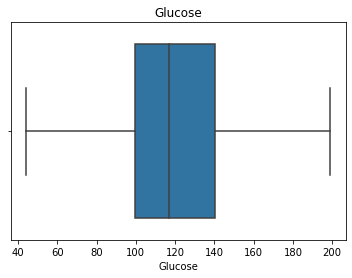

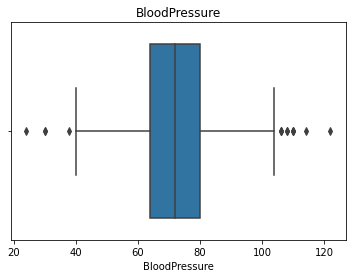

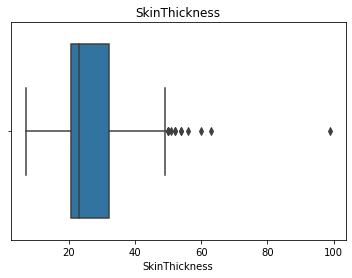

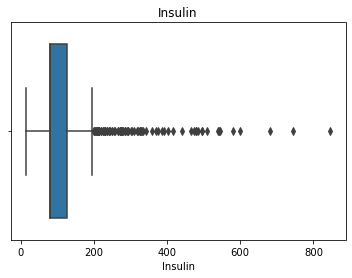

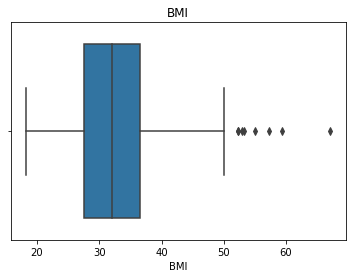

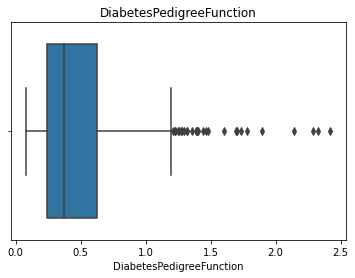

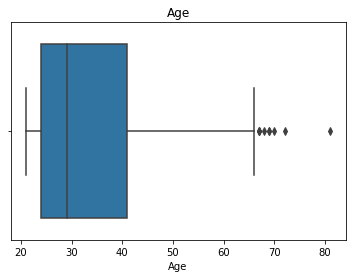

In [16]:
#plotting boxplots for variables to understand skewness, spread and outliers for each column
for col in cols:
    if col != 'Outcome':
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

- Pregnancies, Age, Diabetes pedigree function, BMI, Insulin and SkinThickness are left skewed.
- None of the variables are having outliers beyond realistic values, so no further imputing required.

#### Bivariate Analysis

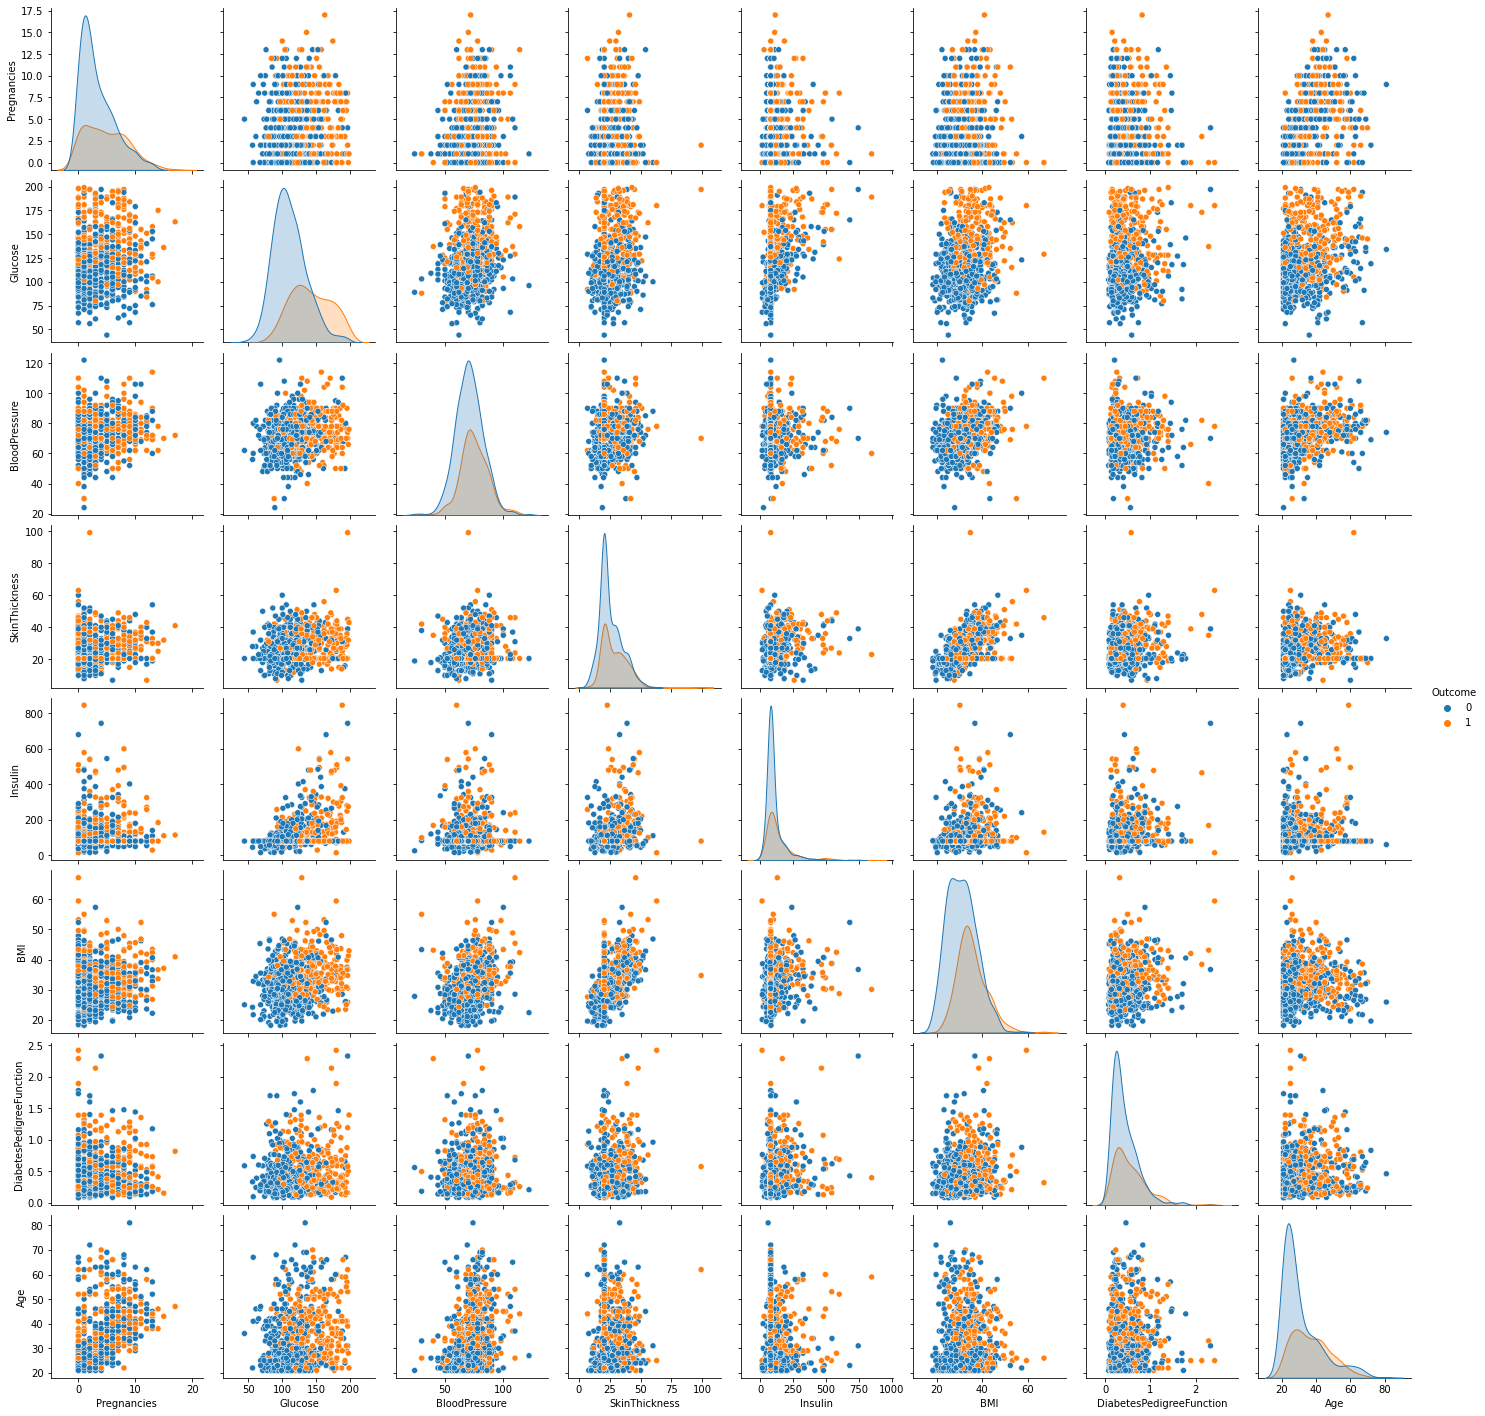

In [17]:
### #checking pairplot for our dataset to understand relationship between features
#it displays scatter plot to visualize if any correlation exists
sns.pairplot(df,hue='Outcome')
plt.savefig("pairplot.jpg")

- For Glucose variable it is observed that chances of getting diabetic increases as Glucose goes above 130.
- In BMI it can be observd that chacnes of getting diabetic increases as BMI goes above 30.

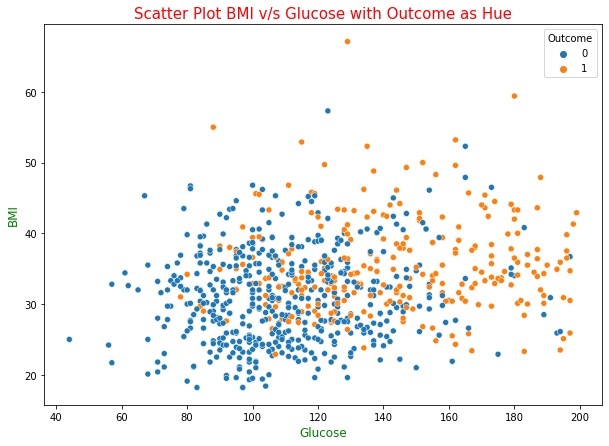

In [18]:
#Plotting scatter plot for BMI and Glucose to get better understanding
plt.figure(figsize=(10,7))
sns.scatterplot(x = df.Glucose, y=df.BMI, hue= df.Outcome)
plt.title('Scatter Plot BMI v/s Glucose with Outcome as Hue',fontdict={'color':'red','size':15})
plt.xlabel('Glucose',fontdict={'color':'green','size':12})
plt.ylabel('BMI',fontdict={'color':'green','size':12})
plt.show()

- It is evident from above scatter plot that if BMI goes above 30 and Glucose goes above 130, chances of getting diabetes are very high.

In [19]:
#lets check correlation in our data
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


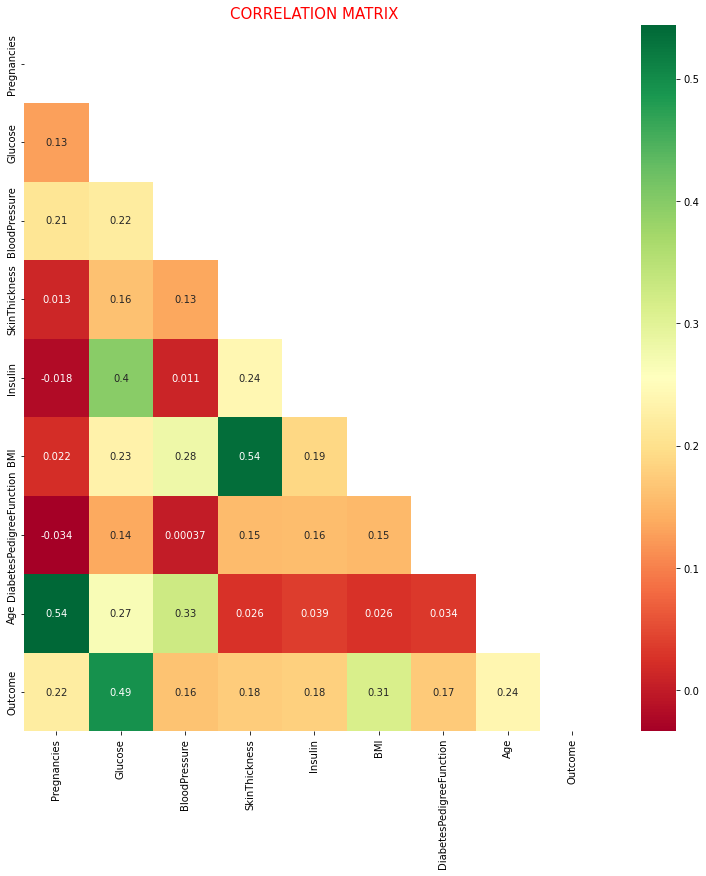

In [20]:
#plotting correlation matrix's heatmap to understand correlation better
plt.figure(figsize=(13,13))
plt.title('CORRELATION MATRIX', fontdict={'color':'red','size':15})
sns.heatmap(corr,annot=True,cmap='RdYlGn',mask=np.triu(np.ones_like(corr)))
plt.savefig("heatmap.jpg")

- There is no high correlation observed in our dataset.
- Age & Pregnancies, Glucose & outcome, BMI & Skin thickness, Insulin & Glucose shows medium correlation.

### Data Preprocessing

In [21]:
#lets split our data into X and y to apply different machine learning models
#X consists of all columns except outcome
#y is the outcome variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [22]:
#lets check how X looks like
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [23]:
#in y which is outcome there should be only 0 or 1 present
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [24]:
#Scaling our dataset to train model and checking it
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
Sc_X = sc.transform(X)
Sc_X

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

- Our data is scaled to carry out training of the models.

In [25]:
#splitting the dataset into train and text with 25% test size and checking shape of each
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Sc_X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


### Training Models

In [26]:
### Training models(classifiers) with default parameters and predicting results

#training our model with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
#predicting the results for logistic regression
y_pred_logreg = logreg.predict(X_test)

#training our model with KNN (K nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
#predicting the results for KNN
y_pred_knn = knn.predict(X_test)

#training our model with Naive-Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
#predicting the results for naive_bayes
y_pred_nb = nb.predict(X_test)

#training our model with Support Vector Machines
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
#predicting the results for SVM
y_pred_svm = svm.predict(X_test)

#training our model with DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
#predicting the results for descison tree
y_pred_dt = dt.predict(X_test)


### Evaluation

In [27]:
#Checking the accuracy score for all our base algorithms(classifiers) with default parameters
from sklearn.metrics import accuracy_score
print(f"The accuracy score for Logisitic Regression is :{accuracy_score(y_test,y_pred_logreg)*100:.2f}")
print(f"The accuracy score for K Nearest Neighbours is :{accuracy_score(y_test,y_pred_knn)*100:.2f}")
print(f"The accuracy score for Naive-bayes is :{accuracy_score(y_test,y_pred_nb)*100:.2f}")
print(f"The accuracy score for Support Vector Machines is :{accuracy_score(y_test,y_pred_svm)*100:.2f}")
print(f"The accuracy score for Decision Tree is :{accuracy_score(y_test,y_pred_dt)*100:.2f}")

The accuracy score for Logisitic Regression is :73.44
The accuracy score for K Nearest Neighbours is :73.44
The accuracy score for Naive-bayes is :72.92
The accuracy score for Support Vector Machines is :73.96
The accuracy score for Decision Tree is :69.79


- Logistic regression, KNN and SVM shows the highest accuracy.

In [28]:
#Checking the Confusion matrix for all our algorithms
from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_nb = confusion_matrix(y_test,y_pred_nb)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_dt = confusion_matrix(y_test,y_pred_dt)

Confusion Matrix Logisitic Regression


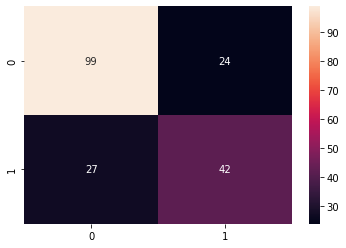

Confusion Matrix K Nearest Neighbour


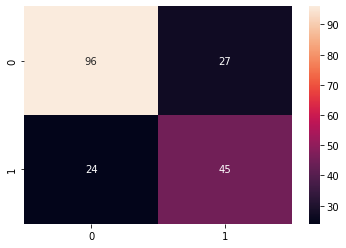

Confusion Matrix Naive-bayes


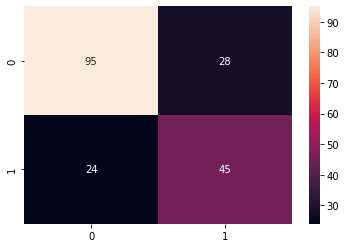

Confusion Matrix Support Vector Machines


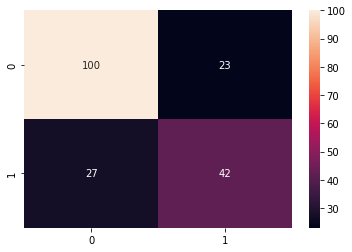

Confusion Matrix Decision Tree


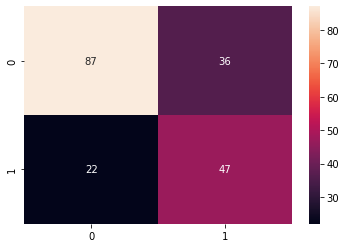

In [29]:
#Plotting confusion matrix for all our base algorithms(classifiers) using heatmap
print('Confusion Matrix Logisitic Regression')
sns.heatmap(cm_logreg,annot=True,fmt='d')
plt.show()
print('Confusion Matrix K Nearest Neighbour')
sns.heatmap(cm_knn,annot=True,fmt='d')
plt.show()
print('Confusion Matrix Naive-bayes')
sns.heatmap(cm_nb,annot=True,fmt='d')
plt.show()
print('Confusion Matrix Support Vector Machines')
sns.heatmap(cm_svm,annot=True,fmt='d')
plt.show()
print('Confusion Matrix Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='d')
plt.show()

In [30]:
#Printing classfication report for all our base algorithms with default settings
from sklearn.metrics import classification_report
print(f"The classification report for Logisitic Regression is :\n{classification_report(y_test,y_pred_logreg,digits=4)}")
print(f"The classification for K Nearest Neighbours is :\n{classification_report(y_test,y_pred_knn,digits=4)}")
print(f"The classification for Naive-bayes is :\n{classification_report(y_test,y_pred_nb,digits=4)}")
print(f"The classification for Support Vector Machines is :\n{classification_report(y_test,y_pred_svm,digits=4)}")
print(f"The classification for Decision Tree is :\n{classification_report(y_test,y_pred_dt,digits=4)}")

The classification report for Logisitic Regression is :
              precision    recall  f1-score   support

           0     0.7857    0.8049    0.7952       123
           1     0.6364    0.6087    0.6222        69

    accuracy                         0.7344       192
   macro avg     0.7110    0.7068    0.7087       192
weighted avg     0.7320    0.7344    0.7330       192

The classification for K Nearest Neighbours is :
              precision    recall  f1-score   support

           0     0.8000    0.7805    0.7901       123
           1     0.6250    0.6522    0.6383        69

    accuracy                         0.7344       192
   macro avg     0.7125    0.7163    0.7142       192
weighted avg     0.7371    0.7344    0.7356       192

The classification for Naive-bayes is :
              precision    recall  f1-score   support

           0     0.7983    0.7724    0.7851       123
           1     0.6164    0.6522    0.6338        69

    accuracy                         

- SVM, Logisitc Regression and K Nearest neighbour is performing better according to classification report.

In [31]:
#defining function to calculate specificty and sensitivity
def calculate_specificity_sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return specificity, sensitivity

In [32]:
# Calculate the specificity and sensitivity for each model
specificity_logreg, sensitivity_logreg = calculate_specificity_sensitivity(y_test, y_pred_logreg)
specificity_knn, sensitivity_knn = calculate_specificity_sensitivity(y_test, y_pred_knn)
specificity_nb, sensitivity_nb = calculate_specificity_sensitivity(y_test, y_pred_nb)
specificity_svm, sensitivity_svm = calculate_specificity_sensitivity(y_test, y_pred_svm)
specificity_dt, sensitivity_dt = calculate_specificity_sensitivity(y_test, y_pred_dt)

# Print the specificity and sensitivity for each model
print(f"Logistic Regression: Specificity={specificity_logreg:.3f}, Sensitivity={sensitivity_logreg:.3f}")
print(f"k-NN: Specificity={specificity_knn:.3f}, Sensitivity={sensitivity_knn:.3f}")
print(f"Naive Bayes: Specificity={specificity_nb:.3f}, Sensitivity={sensitivity_nb:.3f}")
print(f"SVM: Specificity={specificity_svm:.3f}, Sensitivity={sensitivity_svm:.3f}")
print(f"Decision Tree: Specificity={specificity_dt:.3f}, Sensitivity={sensitivity_dt:.3f}")

Logistic Regression: Specificity=0.805, Sensitivity=0.609
k-NN: Specificity=0.780, Sensitivity=0.652
Naive Bayes: Specificity=0.772, Sensitivity=0.652
SVM: Specificity=0.813, Sensitivity=0.609
Decision Tree: Specificity=0.707, Sensitivity=0.681


- Specificity is good for Logistic Regression, K Nearest neighbour and naive-bayes
- Sensitivity is good for KNN, Naive-bayes models

In [33]:
#Calculating Area under curver for all the algorithms used
from sklearn.metrics import roc_curve,roc_auc_score
logreg_fpr, logreg_tpr, thresholds = roc_curve(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, y_pred_nb)
nb_auc = roc_auc_score(y_test, y_pred_nb)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt)

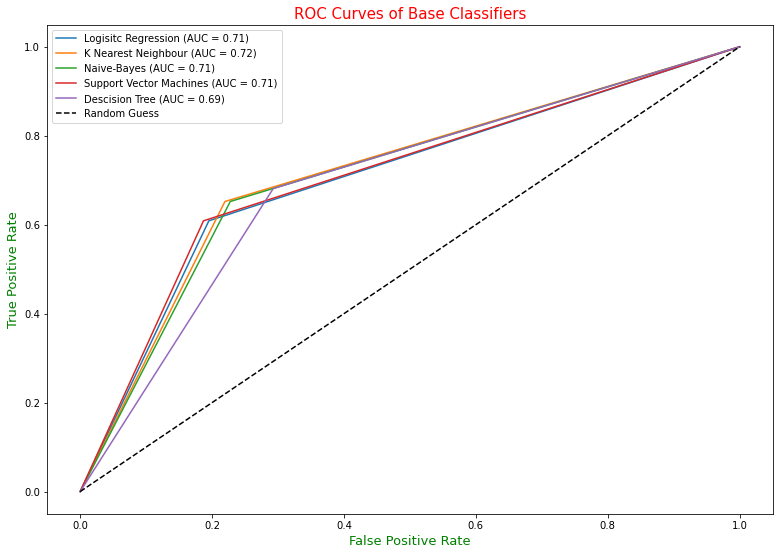

In [34]:
#Plotting ROC curves for all our algorithms used
plt.figure(figsize=(13,9))
plt.plot(logreg_fpr, logreg_tpr, label=f'Logisitc Regression (AUC = {logreg_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'K Nearest Neighbour (AUC = {knn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive-Bayes (AUC = {nb_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'Support Vector Machines (AUC = {svm_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Descision Tree (AUC = {dt_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate',fontdict={'color':'green','size':13})
plt.ylabel('True Positive Rate',fontdict={'color':'green','size':13})
plt.title('ROC Curves of Base Classifiers',fontdict={'color':'red','size':15})
plt.legend()
plt.show()

- KNN is showing the highest AUC score.
- Logistic regression, Naive-bayes and SVM shows same AUC scores.

### KFold Cross validation on base algorithms(classifiers) with default settings

In [35]:
#Using K-fold technique to cross validate our algorithms and checking average accuracy
#importing KFold and Cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)
#Calculating accuracy score for each fold
scores_logreg = cross_val_score(LogisticRegression(), X, y, cv=kf)
scores_knn = cross_val_score(KNeighborsClassifier(), X, y, cv=kf)
scores_nb = cross_val_score(GaussianNB(), X, y, cv=kf)
scores_svm = cross_val_score(SVC(), X, y, cv=kf)
scores_dt = cross_val_score(DecisionTreeClassifier(), X, y, cv=kf)

#Storing scores of each classifier in scores list
scores = [scores_logreg,scores_knn,scores_nb,scores_svm,scores_dt]

#Calculating mean accuracies
average_score_logreg = scores_logreg.mean()
average_score_knn = scores_knn.mean()
average_score_nb = scores_nb.mean()
average_score_svm = scores_svm.mean()
average_score_dt = scores_dt.mean()

#Printing mean accuracies
print(f"Average performance of Logistic Regression is: {average_score_logreg*100:.2f}")
print(f"Average performance of K Nearest Neighbour is: {average_score_knn*100:.2f}")
print(f"Average performance of Naive-Bayes is: {average_score_nb*100:.2f}")
print(f"Average performance of SVM is: {average_score_svm*100:.2f}")
print(f"Average performance of Decision Tree is: {average_score_dt*100:.2f}")


Average performance of Logistic Regression is: 76.82
Average performance of K Nearest Neighbour is: 69.92
Average performance of Naive-Bayes is: 73.96
Average performance of SVM is: 75.00
Average performance of Decision Tree is: 73.96


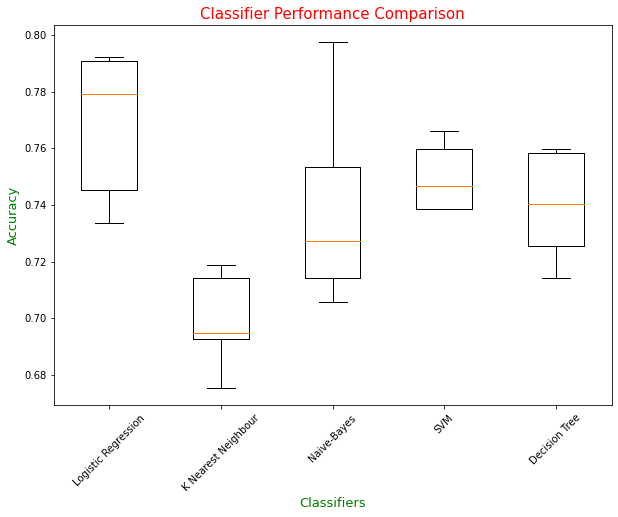

In [36]:
# Create a box plot to compare the scores of each classifier
fig, ax = plt.subplots(figsize = (10,7))
ax.boxplot(scores)
ax.set_xticklabels(['Logistic Regression', 'K Nearest Neighbour', 'Naive-Bayes','SVM','Decision Tree'])
ax.set_ylabel('Accuracy',fontdict = {'fontsize':13,'color':'Green'})
ax.set_xlabel('Classifiers',fontdict = {'fontsize':13,'color':'Green'})
ax.set_title('Classifier Performance Comparison', fontdict = {'fontsize':15,'color':'red'})
plt.xticks(rotation = 45)
plt.show()

- It is evident from above graph that logistic regression shows best accuracy results and median for Logistic regression is 76.9%.
- SVM is the second best model according to KFold Cross validation.
- KNN showed highest AUC score but while using KFold cv it shows least accuracy.
- Naive bayes got the highest accuracy instance and most widely spreaded.

### Gridsearch CV for hyperparameter tuning of Logistic Regression and SVM classifiers

In [37]:
#importing Gridsearch
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
#Defining parameter grid for logistic regression
param_grid_logistic = {
    'penalty': ['l1', 'l2','none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear', 'saga']
}
#Using Gridsearch to get best model and parameters
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_logistic.fit(X_train, y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: pe

/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [38]:
#Saving best parameters and estimators
best_model_logreg = grid_search_logistic.best_estimator_
best_params_logreg = grid_search_logistic.best_params_
print(f"Best parameters: {best_params_logreg}\n")

# Predict on the test set
y_pred_gs_logreg = best_model_logreg.predict(X_test)

# Evaluate the performance of the best model
print(f"Accuracy: {accuracy_score(y_test, y_pred_gs_logreg)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_logreg))

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.7291666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       123
           1       0.63      0.59      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



- We got better accuracy in case of KFold and Default parameters of model, this may happen either because of small size of data or having hyperparameters that do not have a significant impact on the model's performance.

In [39]:
#Defining parameter grid for SVM
param_grid_svm = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'max_iter': [1000],
}
#Using Gridsearch to get best model and parameters
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/Users/abhimanyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': [1000]},
             scoring='accuracy', verbose=1)

In [40]:
#Saving best parameters and estimators
best_model_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_
print(f"Best parameters: {best_params_logreg}\n")

# Predict on the test set
y_pred_gs_svm = best_model_svm.predict(X_test)

# Evaluate the performance of the best model
print(f"Accuracy: {accuracy_score(y_test, y_pred_gs_svm)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gs_svm))

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.68      0.58      0.63        69

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.75      0.75       192



- It is evident that by using gridsearch there is little change in accuracy as compared to default parameters model but if compared to K-fold cross validation the accuracy remains same.

### Ensemble Methods

In [41]:
#Training Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42,criterion='entropy')
rf.fit(X_train, y_train)
#predicting using random forest classifier
y_pred_rf = rf.predict(X_test)

#Boosting using Adaboost classifier with base estimator as Decision tree and max depth = 1
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
#Predicting using Adaboost classifier
y_pred_ab = adaboost.predict(X_test)

#Boosting using GradientBoosting classifier with base estimator as Decision tree and max depth = 3
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
#predicting using GradientBoosting classifier
y_pred_gb = gb.predict(X_test)

In [42]:
#Accuracy score for Ensemble methods
print(f"The accuracy for Random Forest is :{accuracy_score(y_test,y_pred_rf)*100:.2f}")
print(f"The accuracy for Adaboost is :{accuracy_score(y_test,y_pred_ab)*100:.2f}")
print(f"The accuracy for gradient Descent boosting is :{accuracy_score(y_test,y_pred_gb)*100:.2f}")

The accuracy for Random Forest is :78.12
The accuracy for Adaboost is :66.15
The accuracy for gradient Descent boosting is :73.44


- Random forest shows the highest accuracy.

In [43]:
#plotting confusion matrix for ensemble models
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_ab = confusion_matrix(y_test,y_pred_ab)
cm_gb = confusion_matrix(y_test,y_pred_gb)

Confusion Matrix Random Forest


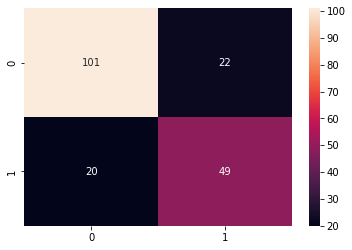

Confusion Matrix Adaboost


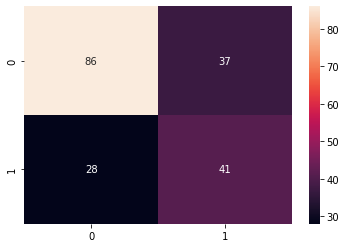

Confusion Matrix Gradient Descent Boosting


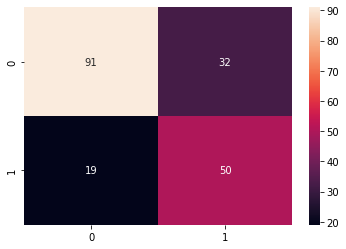

In [44]:
#Plotting confusion matrix using heatmaps for better visualization
print('Confusion Matrix Random Forest')
sns.heatmap(cm_rf,annot=True,fmt='d')
plt.show()
print('Confusion Matrix Adaboost')
sns.heatmap(cm_ab,annot=True,fmt='d')
plt.show()
print('Confusion Matrix Gradient Descent Boosting')
sns.heatmap(cm_gb,annot=True,fmt='d')
plt.show()

In [45]:
#Classfication report for Ensemble methods
print(f"The classification report for Random Forest is :\n{classification_report(y_test,y_pred_rf,digits=4)}")
print(f"The classification for Adaboost is :\n{classification_report(y_test,y_pred_ab,digits=4)}")
print(f"The classification for gradient Descent boosting is :\n{classification_report(y_test,y_pred_gb,digits=4)}")

The classification report for Random Forest is :
              precision    recall  f1-score   support

           0     0.8347    0.8211    0.8279       123
           1     0.6901    0.7101    0.7000        69

    accuracy                         0.7812       192
   macro avg     0.7624    0.7656    0.7639       192
weighted avg     0.7828    0.7812    0.7819       192

The classification for Adaboost is :
              precision    recall  f1-score   support

           0     0.7544    0.6992    0.7257       123
           1     0.5256    0.5942    0.5578        69

    accuracy                         0.6615       192
   macro avg     0.6400    0.6467    0.6418       192
weighted avg     0.6722    0.6615    0.6654       192

The classification for gradient Descent boosting is :
              precision    recall  f1-score   support

           0     0.8273    0.7398    0.7811       123
           1     0.6098    0.7246    0.6623        69

    accuracy                         0.734

- Random Forest shows the best results in classification report.

In [46]:
# Calculate the specificity and sensitivity for each model
specificity_rf, sensitivity_rf = calculate_specificity_sensitivity(y_test, y_pred_rf)
specificity_ab, sensitivity_ab = calculate_specificity_sensitivity(y_test, y_pred_ab)
specificity_gb, sensitivity_gb = calculate_specificity_sensitivity(y_test, y_pred_gb)

# Print the specificity and sensitivity for each model
print(f"Random Forest: Specificity={specificity_rf:.3f}, Sensitivity={sensitivity_rf:.3f}")
print(f"Adaboost={specificity_ab:.3f}, Sensitivity={sensitivity_ab:.3f}")
print(f"Gradient Descent Boosting: Specificity={specificity_gb:.3f}, Sensitivity={sensitivity_gb:.3f}")

Random Forest: Specificity=0.821, Sensitivity=0.710
Adaboost=0.699, Sensitivity=0.594
Gradient Descent Boosting: Specificity=0.740, Sensitivity=0.725


- Random forest is most specific and gradient descent is most sensitive model in ensembled models.

In [47]:
#calculating ROC/AUC scores for ensemble learners
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)
ab_fpr, ab_tpr, thresholds = roc_curve(y_test, y_pred_ab)
ab_auc = roc_auc_score(y_test, y_pred_ab)
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_pred_gb)

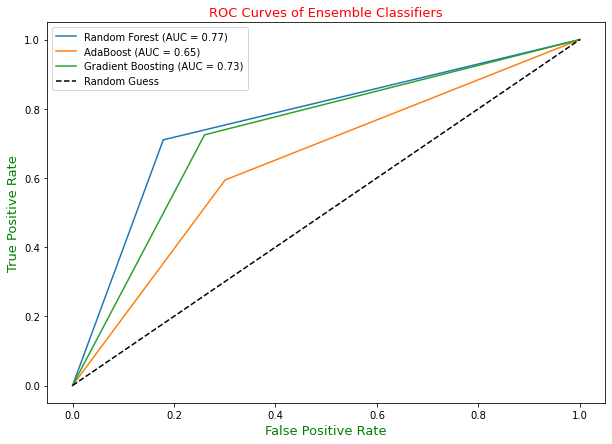

In [48]:
#Checking AUC/ROC curves for ensemble learners
plt.figure(figsize=(10,7))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(ab_fpr, ab_tpr, label=f'AdaBoost (AUC = {ab_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate',fontdict={'color':'green','size':13})
plt.ylabel('True Positive Rate',fontdict={'color':'green','size':13})
plt.title('ROC Curves of Ensemble Classifiers',fontdict={'color':'red','size':13})
plt.legend()
plt.show()

- According to different evaluation metrices on ensemble learners random forest gives the highest accuracy of 78% and AUC score of 77%.

### Most Important features for best performing model

In [49]:
#Getting all the columns of data except outcome to check feature importance
df_permutation_importance = df.loc[:, ~df.columns.isin(['Outcome'])]
df_permutation_importance.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [50]:
#importing permutation_importance function from inspection library
from sklearn.inspection import permutation_importance

# Calculate feature importance using permutation feature importance with random forest model
perm_importance = permutation_importance(rf, X_test, y_test)

# Printing the importance of each feature
for i, feature in enumerate(df_permutation_importance.columns):
    print(f"{feature}: {perm_importance.importances_mean[i]:.3f}")


Pregnancies: 0.036
Glucose: 0.131
BloodPressure: 0.035
SkinThickness: 0.003
Insulin: 0.024
BMI: 0.053
DiabetesPedigreeFunction: 0.041
Age: 0.053


- Glucose feature shows the highest importance for random forest model.

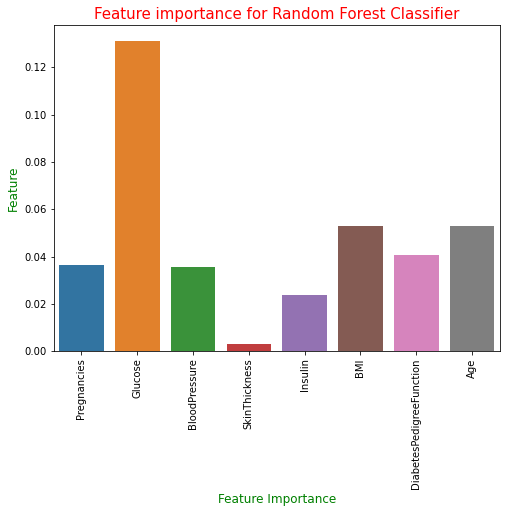

In [51]:
# Plot feature importance as a bar chart
plt.figure(figsize=(8,6))
sns.barplot(df_permutation_importance.columns, perm_importance.importances_mean)
plt.title('Feature importance for Random Forest Classifier',fontdict={'color':'red','size':15})
plt.xlabel('Feature Importance',fontdict={'color':'green','size':12})
plt.ylabel('Feature',fontdict={'color':'green','size':12})
plt.xticks(rotation=90)
plt.show()

### Conclusion



- While using classifiers with default parameters and test size of 0.25 Logistic regression and K nearest Neighbour gives highest accuracy of 74.34 %.
- When we use KFold cross validation Logistic regression gives highest accuracy score of 76.69% and SVM gives accuracy of 74.99%
- Tunning parameters of Logistic Regression and SVM using GridSearch CV improves accuracy for SVM(75%) but not logistic regression(72.9) as compared to default parameters.
- Using ensemble learning models with base classifier as decision tree as it is the default base estimator random forest shows highest accuracy of 78.1 percent.
- We plotted ROC curve for all the models plotted i.e. default models and ensemble learners, KNN gives highest AUC score of 0.72 for default models and in case of ensemble learners random forest gives highest AUC of 0.77 for ensemble learners 
- Overall Random forest have best scores for different metrices i.e. accuracy(78.1), AUC(0.77), precison, recall and f1-score and hence we can consider this as our best fitting model.
- Glucose feature is the most important feature for our best performing random forest model.